## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Importing Datasets

In [14]:
my_data_dir='D:\\NMIMS\\Trim 3\\Deep Learning\\End Term Proj\\cell_images\\cell_images'

In [15]:
os.listdir(my_data_dir) 

['test', 'train']

In [18]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [17]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [19]:
os.listdir(train_path)

['parasitized', 'uninfected']

## Parasitized Cell

In [20]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [21]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [22]:
para_img= imread(para_cell)

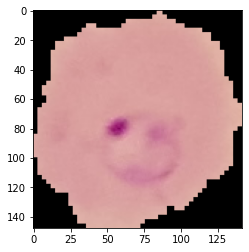

In [23]:
plt.imshow(para_img)

In [24]:
para_img.shape

(148, 142, 3)

## Uninfected Cell

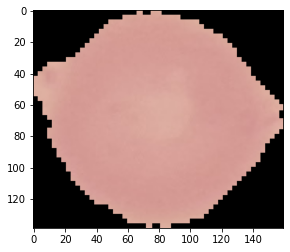

In [25]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [26]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [27]:
len(os.listdir(train_path+'\\uninfected'))

12480

## Checking the Dimensions

In [28]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


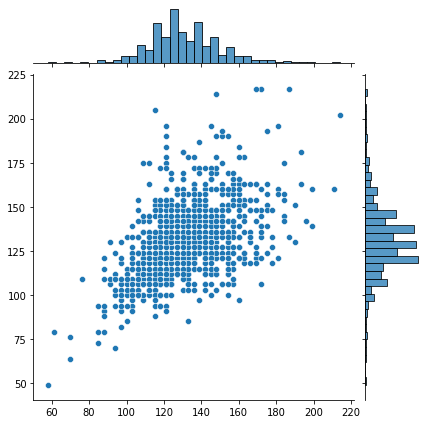

In [29]:
sns.jointplot(dim1,dim2)

In [30]:
np.mean(dim1)

130.92538461538462

In [31]:
np.mean(dim2)

130.75

In [32]:
image_shape = (130,130,3)

## Augmenting Image

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

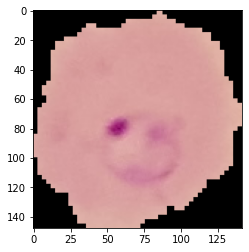

In [35]:
plt.imshow(para_img)

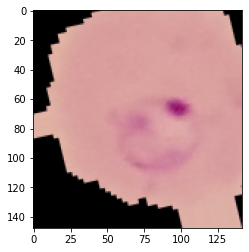

In [36]:
plt.imshow(image_gen.random_transform(para_img))

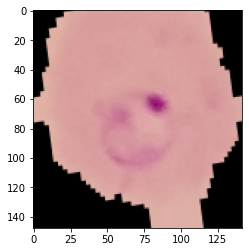

In [37]:
plt.imshow(image_gen.random_transform(para_img))

In [38]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [39]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Convolutional Neural Networks (CNN)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [71]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

x
model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)      

## EarlyStopping

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [75]:
#batch_size = 16

In [76]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [77]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [78]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [79]:
import warnings
warnings.filterwarnings('ignore')

## Running Epochs

In [80]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
780/780 [==============================] - 495s 634ms/step - loss: 0.3464 - accuracy: 0.8541 - val_loss: 0.1803 - val_accuracy: 0.9346
Epoch 2/20
780/780 [==============================] - 369s 473ms/step - loss: 0.1885 - accuracy: 0.9409 - val_loss: 0.1790 - val_accuracy: 0.9373
Epoch 3/20
780/780 [==============================] - 350s 448ms/step - loss: 0.1692 - accuracy: 0.9469 - val_loss: 0.1753 - val_accuracy: 0.9423
Epoch 4/20
780/780 [==============================] - 479s 615ms/step - loss: 0.1615 - accuracy: 0.9493 - val_loss: 0.1672 - val_accuracy: 0.9454
Epoch 5/20
780/780 [==============================] - 435s 557ms/step - loss: 0.1569 - accuracy: 0.9516 - val_loss: 0.1546 - val_accuracy: 0.9462
Epoch 6/20
780/780 [==============================] - 326s 418ms/step - loss: 0.1533 - accuracy: 0.9514 - val_loss: 0.1595 - val_accuracy: 0.9454
Epoch 7/20
780/780 [==============================] - 437s 560ms/step - loss: 0.1510 - accuracy: 0.9517 - val_loss: 0.1536 -

In [ ]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [81]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

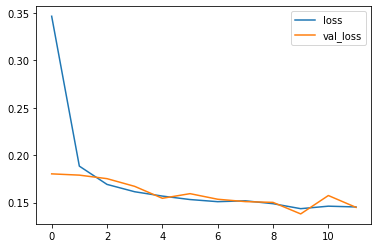

In [82]:
losses[['loss','val_loss']].plot()

In [83]:
model.metrics_names

['loss', 'accuracy']

In [84]:
model.evaluate_generator(test_image_gen)

[0.1499965935945511, 0.9469230771064758]

## Predicting Probabilities

In [85]:
pred_probabilities = model.predict_generator(test_image_gen)

In [86]:
pred_probabilities

array([[1.3753176e-03],
       [8.3830953e-04],
       [1.1823177e-03],
       ...,
       [9.6989024e-01],
       [9.6984351e-01],
       [8.3757627e-01]], dtype=float32)

In [87]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
predictions = pred_probabilities > 0.5

In [89]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

## Confusion Matrix

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



## <center>THANK YOU!</center>